# MNIST
The MNIST dataset is a dataset of written numbers stored in 28x28 pixel greyscale images and is commonly used as a training dataset for neural networks and is frequently used as an introductory learning tool for Machine Learning (ML) and Artificial Intelligence (AI)

This project is precisely such a use of the MNIST dataset

As well as a self taught introduction to ML, this project is also to serve as further development of my python skills and will be the first time using Git source control
The end goal is to have a fully functioning ML model built from scratch to demostrate my proficiency in writing code in python, using Git as a source control tool but most importantly show my mathematical capability to understand and impliment complex machine learning algorithms 

My starting point is a masters (integrated, 4 year) degree in particle physics and cosmology, in which I learned linear algebra for use in tensor calculus in areas such as Quantum Field Theory. During my degree I also learning basic python programming as an important tool for any experimental phycicist to be able to analyse data. Now, with experience in a role as a data analyst I am looking to expand my skills set and learn the basics of data engineering and data science with the hope to steer my career into one of those fields.

# The Project

This project will make use of the 28x28 pixel images totalling 784 pixels per image as training and test datasets to build a neural network around. Each pixel is just a pixel value between 0 - 255, where 0 is completely black and 255 being a fully white pixel. This range allows the pixels in between to be greyscale. We will consider m training images

Consider the pixel values stored in a matrix X which has dimensions m x 784. Transposing this matrix so each image example is in a column:

\begin{equation}
    X = \begin{bmatrix}
        x_{1}^{1} & x_{1}^{2} & x_{1}^{3} & x_{1}^{4} ... & x_{1}^{784}\\
        \\
        x_{2}^{1} & x_{2}^{2} & x_{2}^{3} & x_{2}^{4} ... & x_{2}^{784}\\
        \\
        && .
        \\
        &&.
        \\
        &&.
        \\
        x_{m}^{1} & x_{m}^{2} & x_{m}^{3} & x_{m}^{4} ... & x_{2}^{784}
        \end{bmatrix}^{T}
        = 
        \begin{bmatrix}
        x_{1}^{1} & x_{2}^{1} & x_{3}^{1} & x_{4}^{2} ... x_{m}^{1}\\
        \\
        x_{1}^{2} & x_{2}^{2} & x_{3}^{1} & x_{4}^{2} ... x_{m}^{2}\\
        \\
        && .
        \\
        &&.
        \\
        &&.
        \\
        x_{1}^{784} & x_{2}^{784} & x_{3}^{784} & x_{4}^{784} ... x_{m}^{783}
        \end{bmatrix}
\end{equation}

where $x_{i}^{j}$ is the jth pixel in image i.

The target is to build a simple program to do some processing on each column $x_{i}$ to produce a prediction for what intiger $\hat{x_{i}}$ the image represents.

# Neural Networks (NN)

A neural network is a network of "nodes" arranged in layers which are all connected to each node in the adjecent layers. The layers can be thought of as lines of dots where each dot is a node and each node has a line connecting it to every node in the previous and subsquent layers.


### Our Neural Network

The program will use a simple neural network made up of 3 layers, 1 input (or $0^{th}$) layer with 784 input nodes which correspond to the 784 pixels in the given image, 1 hidden layer ($1^{st}$) which does the actual computation and 1 output ($2^{nd}$) layer. Both the hidden and output layers will have 10 nodes corresponding to the 10 possible arabic integers that a given image could be.

### Forward Propogation

Forward propogation is when we put an image into the input and the NN predicts and output. To compute the forward propogation we denote the values at the input later as $A^{[0]}$ which is just equal to X since there are no patameters in this layer: $A^{[0]} = X$ (784 x m)

We define $Z^{[1]}$ as the unactivated 1st layer which is computerd from the dot product of $A^{[0]}$ using the equation: 
\begin{equation}
    Z^{[1]} = W^{[1]} A^{[0]} + b^{[1]}
\end{equation}
where $W^{[1]}$ is a 10 x 784 weight matrix and $b^{[1]}$ is a 10 x 1 bias term resulting in $Z^{[1]}$ being 10 x m.

This is effectively calculating $Z^{[1]}$ by multiplying $A^{[0]}$ by the weight associated with each of the 7840 connections between the 0th and 1st layer and then adding a bias term to the result. At this point however, we have only constructed the nodes in the 1st layer as a linear combination of the nodes from the input layer plus a bias term, to get an intersting and meaningful result we need to activate $Z^{[1]}$ by applying an activation function to it. In this case that function is the Rectified Linear Unit (ReLu) function which when applied to $Z^{[1]}$ gives us $A^{[1]}$ which contains the values of the nodes in the 1st or hidden layer
\begin{equation}
    ReLu(x) = \begin{cases}
        x<0 & 0\\
        x>=0 & 1
        \end{cases}
\end{equation}
With no activation each node in each subsequent layer is just a linear combination of nodes in the previous layer so the 2nd or output layer would just be a linear combination from the first layer which itself is just a linear combination of the input layer, therefore the output layer would just be an overly complex linear combination of the input layer which isn't going to product any interesting results or predictions.

Other common activation functions are $tanh(\theta)$ or the sigmoid function $S(X) = \frac{1}{1+e^{-x}}$. $tanh(\theta)$ is the ratio of the hyperbolic analogues of $sin(\theta)$ and $cosine(\theta)$, $sinh(\theta)$ and $cosh(\theta)$ respectively

# Some Basic Trig
The irrational number $e \approx 2.7182818284...$ is the real number whos' unique property is that when raised to the power of x the gradient of that function (the derivative) at any given value of x is equal to the value of that function, ie
\begin{equation}
    \frac{d}{dx} e^{x} = e^{x}
\end{equation}
The trigonometric functions and hyperbolic functions defined based on the circle and hyperbola respectively can all be written in terms of the special number e:

\begin{equation}
    sin(z) = \frac{e^{iz}-e^{-iz}}{2i}  
\end{equation}

\begin{equation}
    cos(z) = \frac{e^{iz}+e^{-iz}}{2}
\end{equation}

\begin{equation}
    sinh(z) = \frac{e^{z}-e^{-z}}{2}
\end{equation}

\begin{equation}
    cosh(z) = \frac{e^{z}+e^{-z}}{2}
\end{equation}

\begin{equation}
    tanh(z) = \frac{sinh(z)}{cosh(z)} = \frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}
\end{equation}

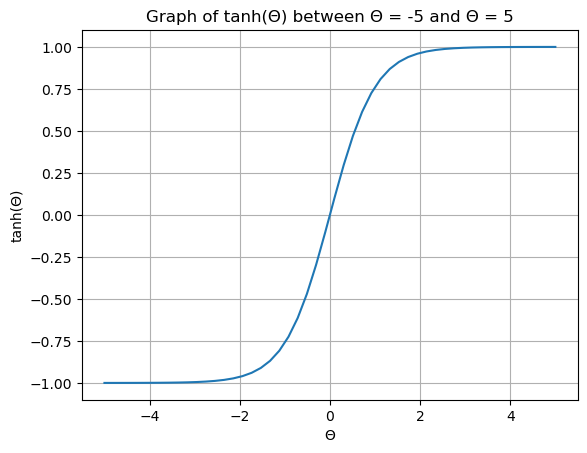

In [7]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(-5,5)
tanh = [i for i in np.tanh(theta)]
plt.plot(theta,tanh)
plt.grid()
plt.title("Graph of tanh(Θ) between Θ = -5 and Θ = 5")
plt.xlabel("Θ")
plt.ylabel("tanh(Θ)")
plt.show()